# CREATE TRAIN AND TEST DATASET

In [1]:
import scipy.io as scio
x,y = scio.loadmat('oil_data.mat')['oil_raw_data'].transpose(),\
      scio.loadmat('oil_label.mat')['data_label'][:,5]

Normalizing

In [2]:
xmin,xmax ,ymin,ymax = x.min(),x.max(),y.min(),y.max()
x,y = (x-xmin)/(xmax-xmin),(y-ymin)/(ymax-ymin)

Show the spectrum

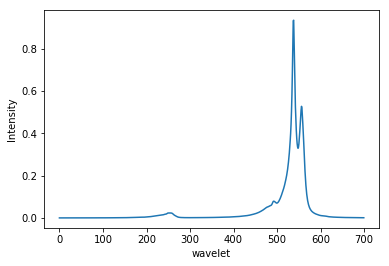

In [3]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(x[2,:])
ax.set(xlabel='wavelet',
       ylabel='Intensity')
plt.show()

Split dataset

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,
                                                random_state=0)

# FIT REGRESSION MODEL

In [5]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
import numpy as np
import time

In [6]:
svr = GridSearchCV(SVR(kernel='rbf',gamma=0.1),cv=5,scoring='neg_mean_squared_error',verbose=0,n_jobs=-1,
                  param_grid ={'C':[1e0,1e2,1e3],
                               'gamma':np.logspace(-2,2,5)})

In [7]:
kr = GridSearchCV(KernelRidge(kernel='rbf',gamma=0.1),cv=5,scoring='neg_mean_squared_error',verbose=0,n_jobs=-1,
                 param_grid ={'alpha':[1e0,1e-1,1e-2,1e-3],
                             'gamma':np.logspace(-2,2,5)})

TIME COMSUMPTION

In [9]:
t0 = time.time()
svr.fit(x_train,y_train)
svr_fit_time = time.time()-t0
print('SVR complexity and bandwidth selected and model fitted in %0.3f s'%svr_fit_time)
svr_ratio = svr.best_estimator_.support_.shape[0]/x_train.shape[0]
print('Support vector ratio:%0.3f '%svr_ratio)

t0 = time.time()
kr.fit(x_train,y_train)
kr_fit_time = time.time()-t0
print('KRR complexity and bandwidth selected and model fitted in %0.3f s'%kr_fit_time)

t0 = time.time()
y_svr_test  = svr.predict(x_test)
y_svr_train = svr.predict(x_train)
svr_predict_time = time.time()-t0
print('SVR prediction for %d in %0.3fs'%(x_test.shape[0],svr_predict_time))

t0 = time.time()
y_kr_test  = kr.predict(x_test)
y_kr_train = kr.predict(x_train)
krr_predict_time = time.time()-t0
print('KRR prediction for %d in %0.3fs'%(x_test.shape[0],krr_predict_time))

SVR complexity and bandwidth selected and model fitted in 3.243 s
Support vector ratio:0.208 
KRR complexity and bandwidth selected and model fitted in 3.740 s
SVR prediction for 119 in 0.062
KRR prediction for 119 in 0.016


LOOK AT RESULTS

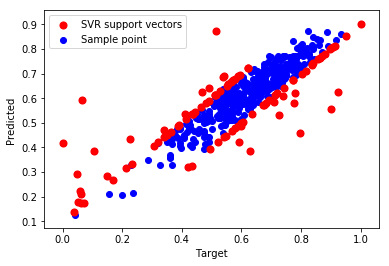

In [14]:
svr_ind = svr.best_estimator_.support_
plt.scatter(y_train[svr_ind],y_svr_train[svr_ind],c='r',s=50,label='SVR support vectors',zorder=2)
plt.scatter(y_train,y_svr_train,c='b',label='Sample point',zorder=1)
plt.xlabel('Target')
plt.ylabel('Predicted ')
plt.legend()
plt.show()

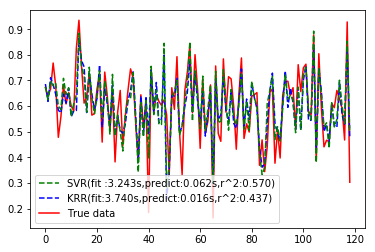

In [31]:
from sklearn.metrics import r2_score
plt.plot(y_svr_test,'g--',label='SVR(fit :%0.3fs,predict:%0.3fs,r^2:%0.3f)'%(svr_fit_time,svr_predict_time,r2_score(y_svr_test,y_test)),zorder=3)
plt.plot(y_kr_test,'b--',label='KRR(fit:%0.3fs,predict:%0.3fs,r^2:%0.3f)'%(kr_fit_time,krr_predict_time,r2_score(y_kr_test,y_test)),zorder=2)
plt.plot(y_test,'r-',label='True data',zorder=1)
plt.legend()
plt.show()